Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 100, size=1000000), columns=['Random Numbers'])
end_time_pandas = time.time()

time_pandas = end_time_pandas - start_time_pandas
print(f"Time taken by pandas: {time_pandas} seconds")


start_time_numpy = time.time()
numpy_data = np.random.randint(1, 100, size=1000000)
end_time_numpy = time.time()

time_numpy = end_time_numpy - start_time_numpy
print(f"Time taken by numpy: {time_numpy} seconds")

if time_numpy < time_pandas:
    print(f"NumPy is faster by {time_pandas - time_numpy} seconds")
else:
    print(f"Pandas is faster by {time_numpy - time_pandas} seconds")

Time taken by pandas: 0.012851953506469727 seconds
Time taken by numpy: 0.01134181022644043 seconds
NumPy is faster by 0.0015101432800292969 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [53]:
import pandas as pd
import numpy as np
import time

# -------------------- Using Pandas --------------------
start_time_pandas = time.time()

df = pd.read_csv('sleep_health.csv')

mean_sleep_duration = df['Sleep Duration'].mean()
mean_systolic_bp = df['Systolic blood pressure'].mean()
mean_diastolic_bp = df['Diastolic blood pressure'].mean()
mean_heart_rate = df['Heart Rate'].mean()
mean_daily_steps = df['Daily Steps'].mean()

print(f"Pandas - Mean Sleep Duration: {mean_sleep_duration}")
print(f"Pandas - Mean Systolic BP: {mean_systolic_bp}")
print(f"Pandas - Mean Diastolic BP: {mean_diastolic_bp}")
print(f"Pandas - Mean Heart Rate: {mean_heart_rate}")
print(f"Pandas - Mean Daily Steps: {mean_daily_steps}")


correlation_matrix = df.corr(numeric_only=True)

corr_sleep_age = df['Sleep Duration'].corr(df['Age'])
corr_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
corr_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])

print(f"Pandas - Correlation between Sleep Duration and Age: {corr_sleep_age}")
print(f"Pandas - Correlation between Sleep Duration and Heart Rate: {corr_sleep_heart_rate}")
print(f"Pandas - Correlation between Sleep Duration and Daily Steps: {corr_sleep_daily_steps}")


std_sleep_duration_pandas = df['Sleep Duration'].std()
print(f"Pandas - Standard Deviation for Sleep Duration: {std_sleep_duration_pandas}")

end_time_pandas = time.time()
time_pandas = end_time_pandas - start_time_pandas
print(f"Time taken by Pandas: {time_pandas} seconds")

# -------------------- Using NumPy --------------------
start_time_numpy = time.time()


data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=float)


age = data[:, 2] 
sleep_duration = data[:, 4] 
systolic_bp = data[:, 9] 
diastolic_bp = data[:, 10] 
heart_rate = data[:, 11] 
daily_steps = data[:, 12] 


mean_sleep_duration_numpy = np.mean(sleep_duration)
mean_systolic_bp_numpy = np.mean(systolic_bp)
mean_diastolic_bp_numpy = np.mean(diastolic_bp)
mean_heart_rate_numpy = np.mean(heart_rate)
mean_daily_steps_numpy = np.mean(daily_steps)

print(f"NumPy - Mean Sleep Duration: {mean_sleep_duration_numpy}")
print(f"NumPy - Mean Systolic BP: {mean_systolic_bp_numpy}")
print(f"NumPy - Mean Diastolic BP: {mean_diastolic_bp_numpy}")
print(f"NumPy - Mean Heart Rate: {mean_heart_rate_numpy}")
print(f"NumPy - Mean Daily Steps: {mean_daily_steps_numpy}")


corr_sleep_age_numpy = np.corrcoef(age, sleep_duration)[0, 1]
corr_sleep_heart_rate_numpy = np.corrcoef(sleep_duration, heart_rate)[0, 1]
corr_sleep_daily_steps_numpy = np.corrcoef(sleep_duration, daily_steps)[0, 1]

print(f"NumPy - Correlation between Sleep Duration and Age: {corr_sleep_age_numpy}")
print(f"NumPy - Correlation between Sleep Duration and Heart Rate: {corr_sleep_heart_rate_numpy}")
print(f"NumPy - Correlation between Sleep Duration and Daily Steps: {corr_sleep_daily_steps_numpy}")


std_sleep_duration_numpy = np.std(sleep_duration)
print(f"NumPy - Standard Deviation for Sleep Duration: {std_sleep_duration_numpy}")

end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy
print(f"Time taken by NumPy: {time_numpy} seconds")

# -------------------- Time Comparison --------------------
if time_numpy < time_pandas:
    print(f"NumPy is faster by {time_pandas - time_numpy} seconds")
else:
    print(f"Pandas is faster by {time_numpy - time_pandas} seconds")

Pandas - Mean Sleep Duration: 7.132085561497325
Pandas - Mean Systolic BP: 128.55347593582889
Pandas - Mean Diastolic BP: 84.64973262032086
Pandas - Mean Heart Rate: 70.16577540106952
Pandas - Mean Daily Steps: 6816.844919786096
Pandas - Correlation between Sleep Duration and Age: 0.34470935816474385
Pandas - Correlation between Sleep Duration and Heart Rate: -0.5164548885171427
Pandas - Correlation between Sleep Duration and Daily Steps: -0.03953253767573259
Pandas - Standard Deviation for Sleep Duration: 0.7956567308898189
Time taken by Pandas: 0.00746607780456543 seconds
NumPy - Mean Sleep Duration: 7.132085561497325
NumPy - Mean Systolic BP: 128.55347593582889
NumPy - Mean Diastolic BP: 84.64973262032086
NumPy - Mean Heart Rate: 70.16577540106952
NumPy - Mean Daily Steps: 6816.844919786096
NumPy - Correlation between Sleep Duration and Age: 0.34470935816474385
NumPy - Correlation between Sleep Duration and Heart Rate: -0.5164548885171427
NumPy - Correlation between Sleep Duration a

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

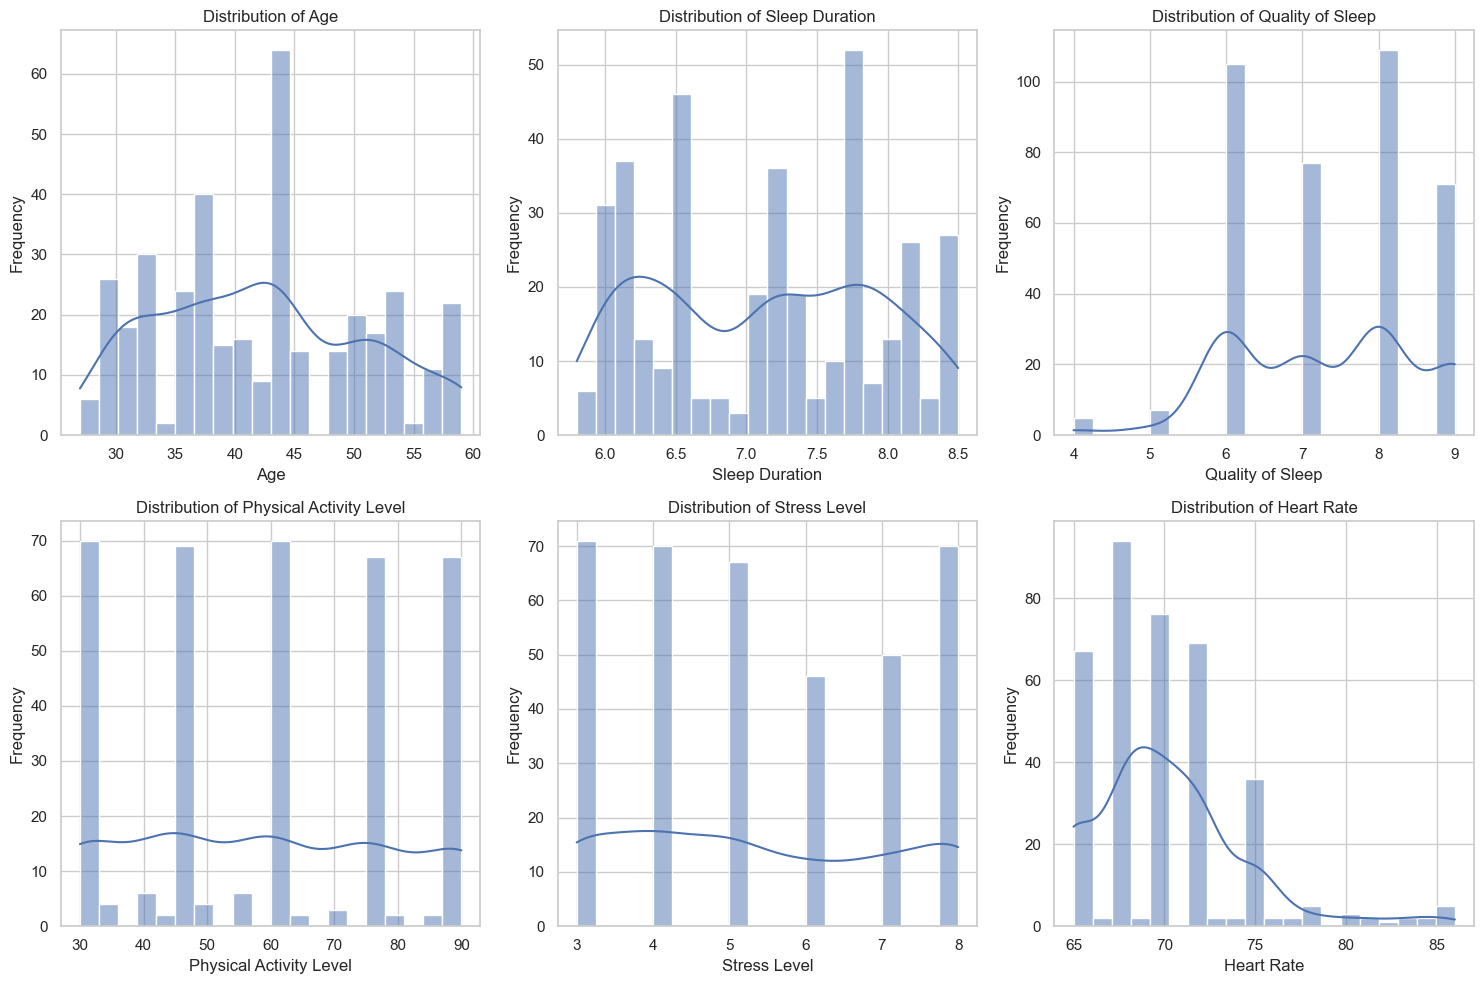

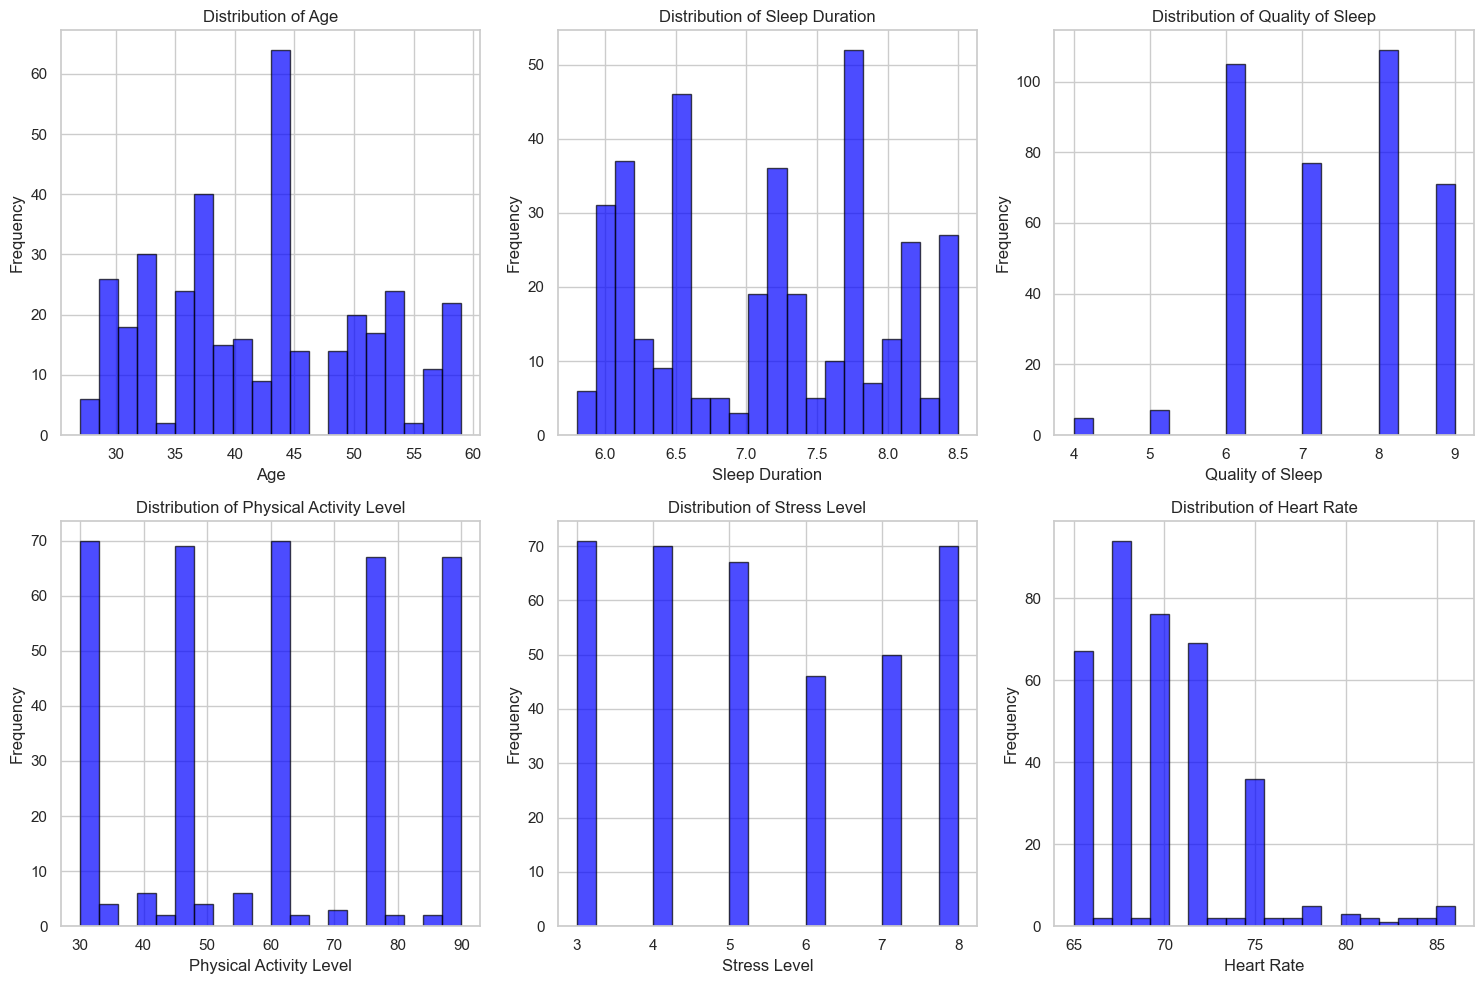

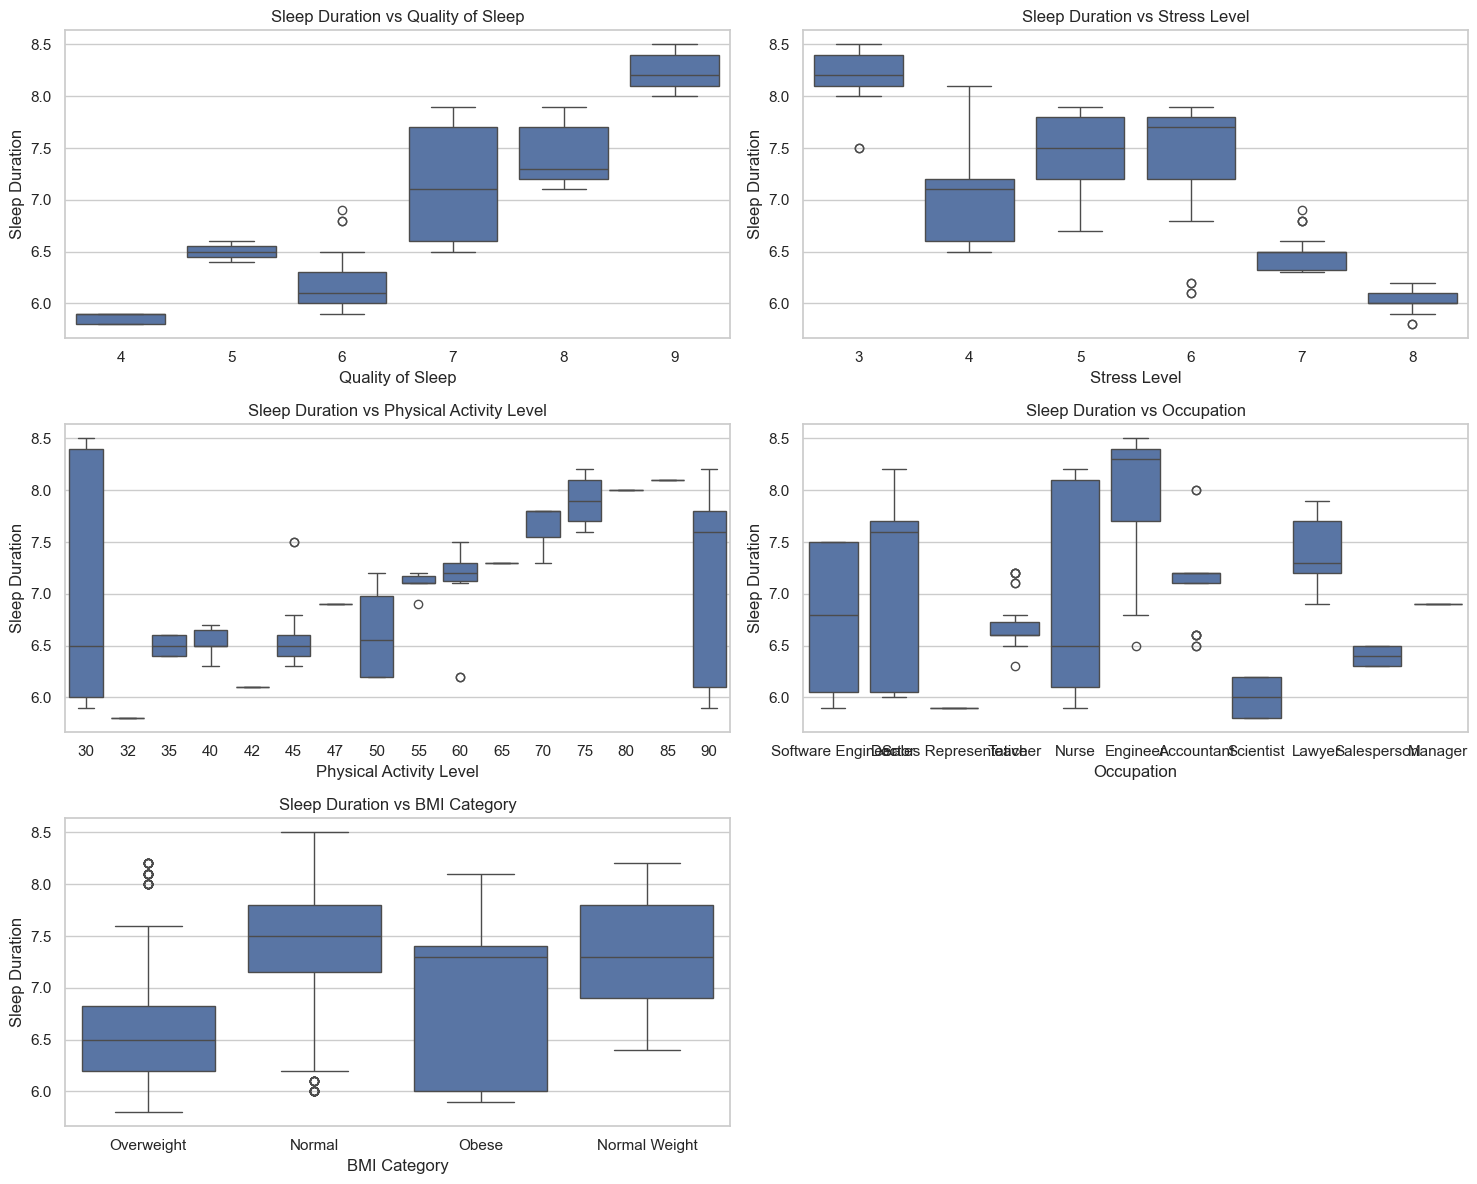

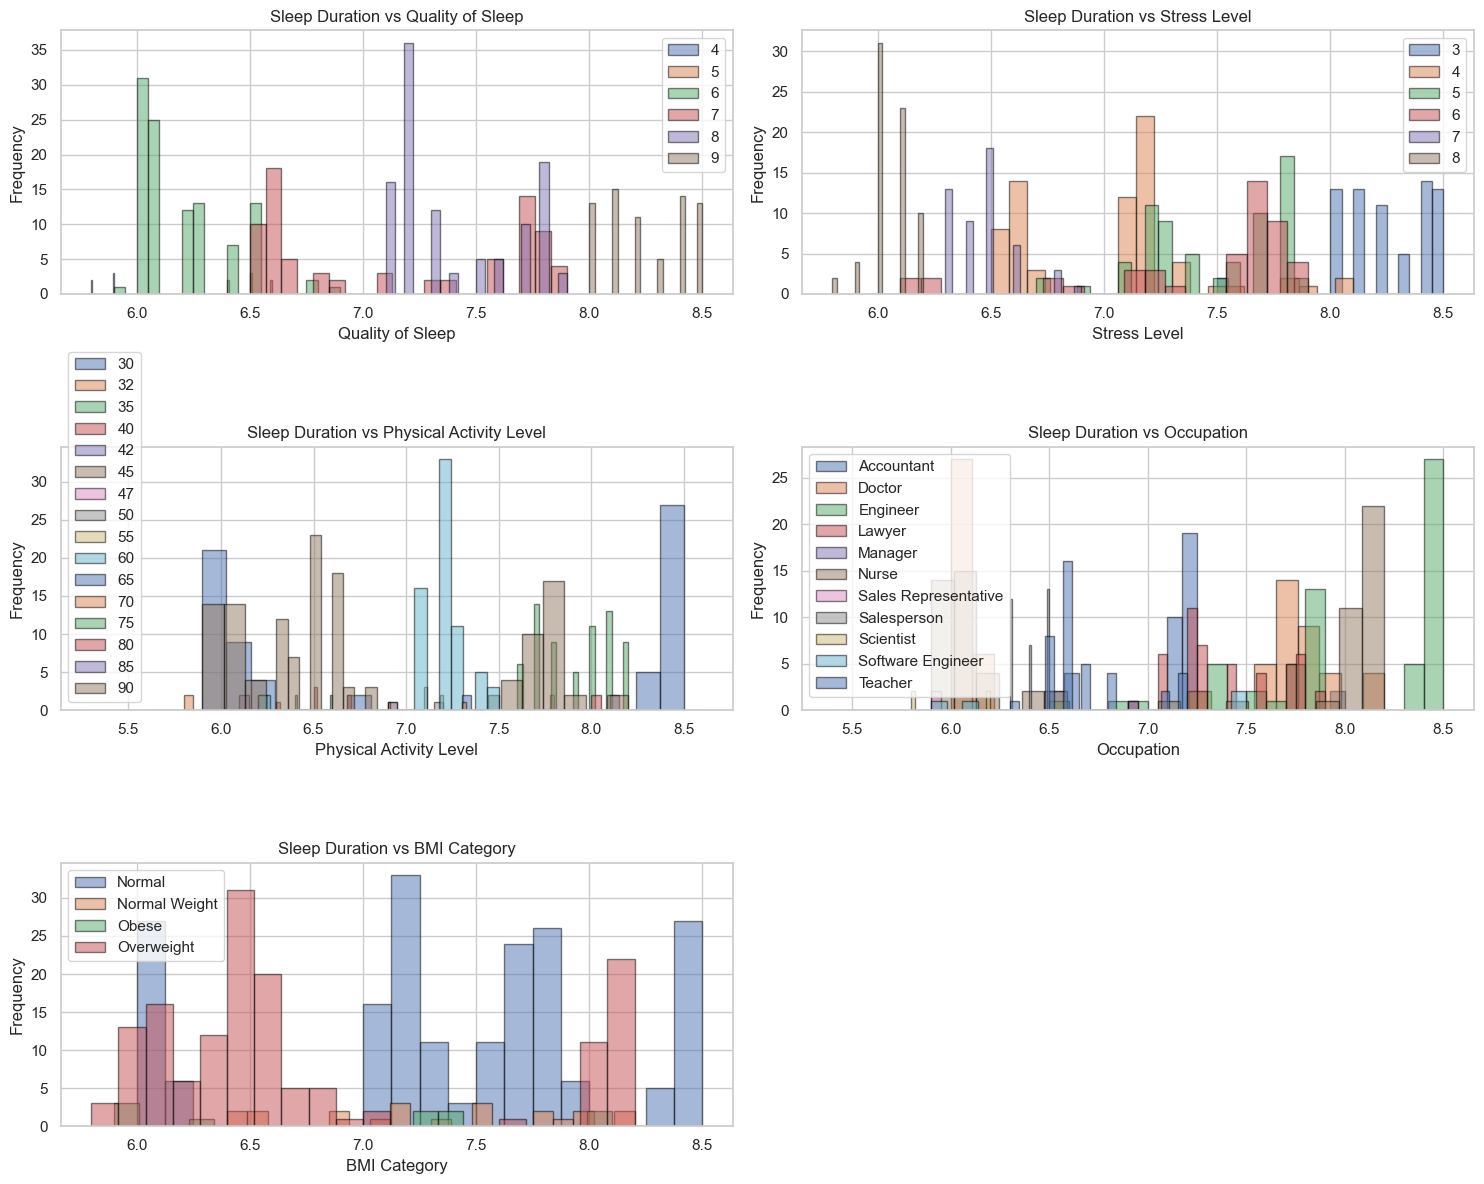

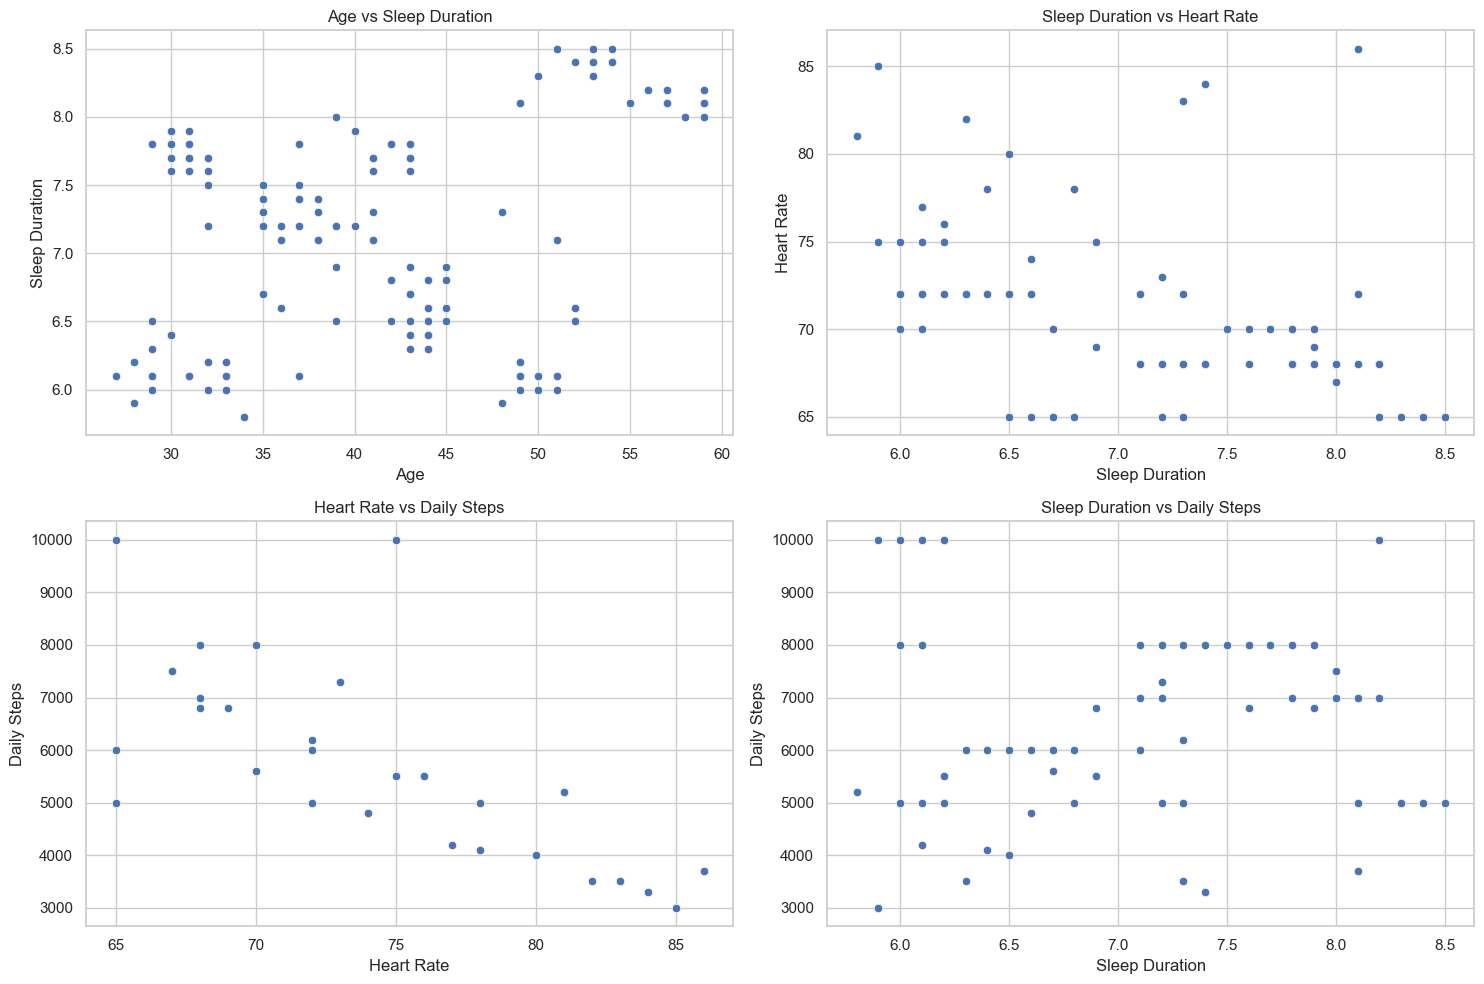

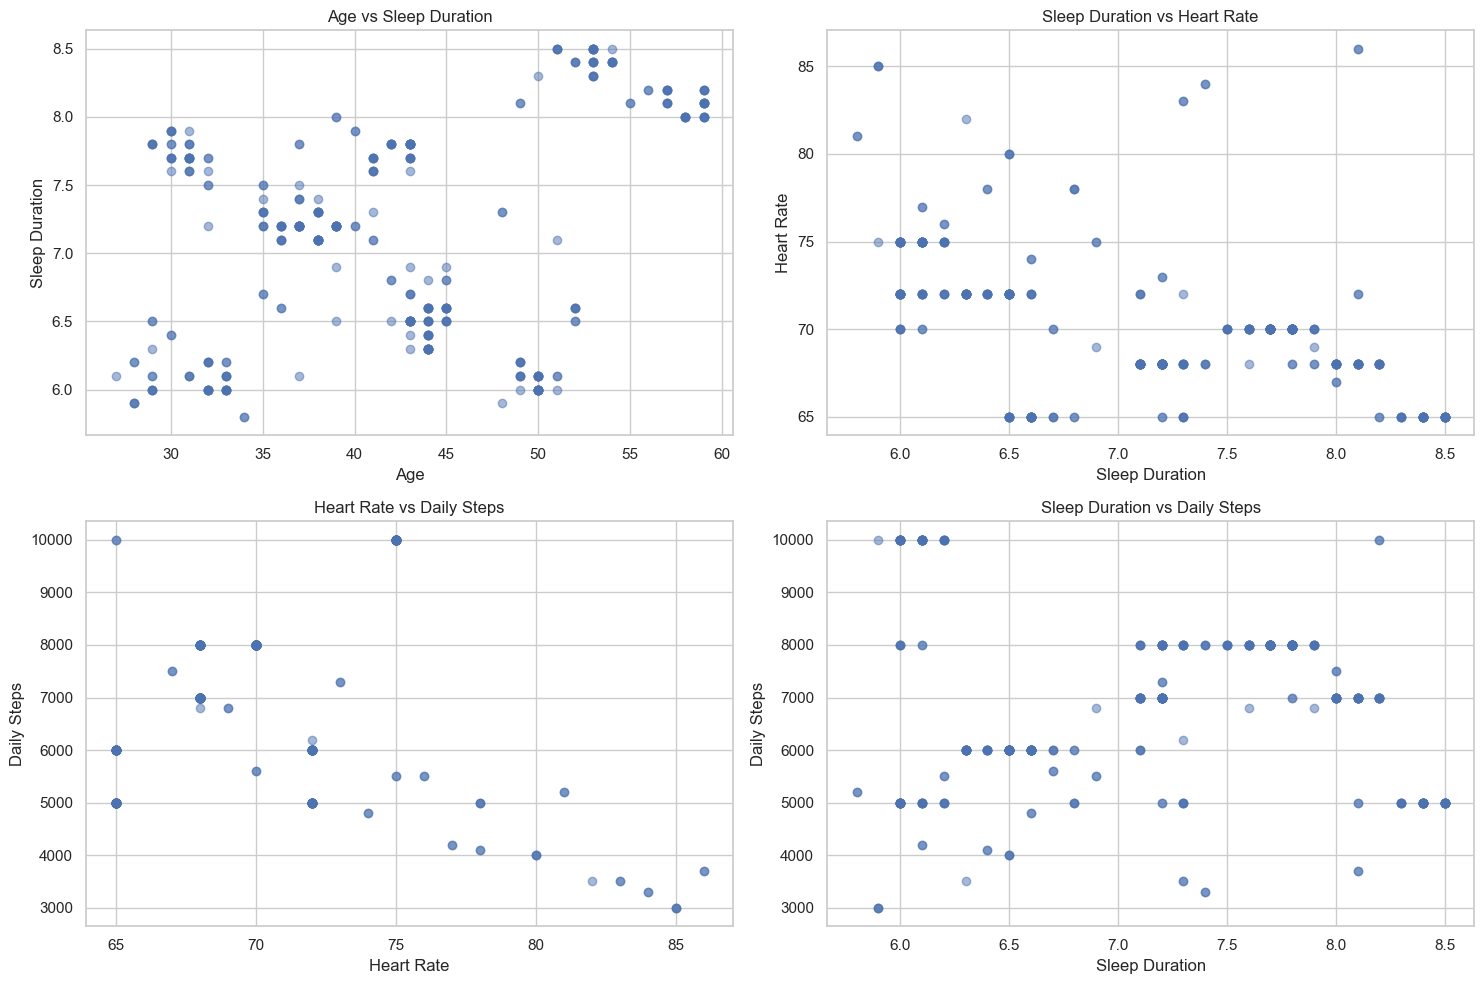

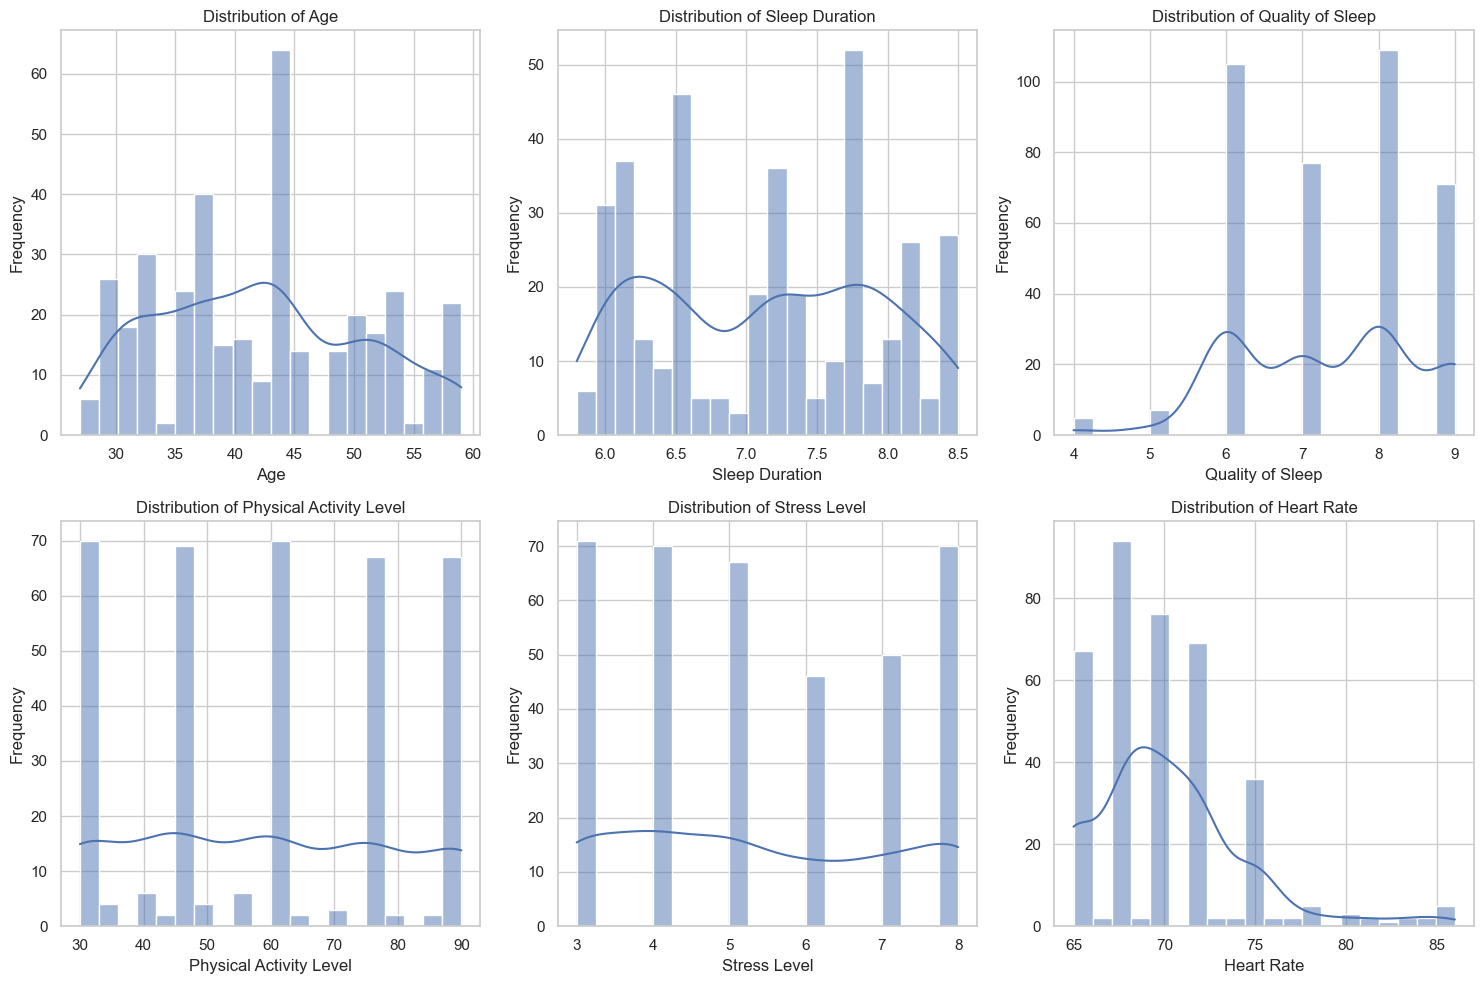

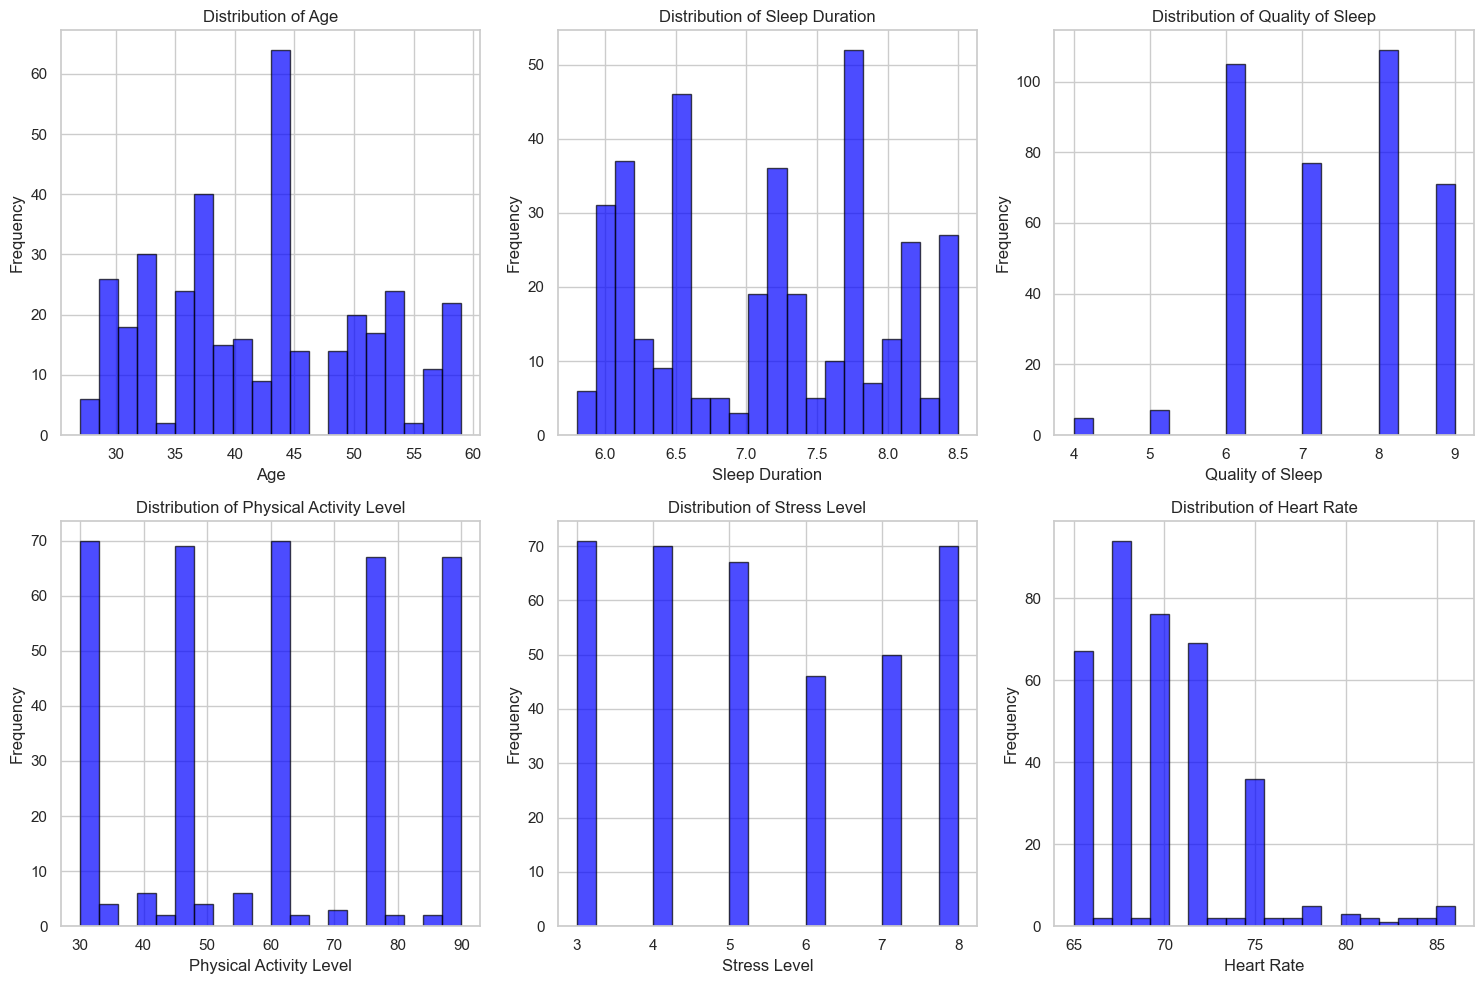

Time taken using Pandas: 1.4830 seconds
Time taken using NumPy: 0.9375 seconds


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

data = pd.read_csv('sleep_health.csv')

sns.set(style="whitegrid")

features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[feature].to_numpy(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

categories = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[category], y=data['Sleep Duration'])
    plt.title(f'Sleep Duration vs {category}')
    plt.xlabel(category)
    plt.ylabel('Sleep Duration')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories, 1):
    plt.subplot(3, 2, i)
    unique_categories = np.unique(data[category].to_numpy())
    for cat in unique_categories:
        subset = data[data[category] == cat]['Sleep Duration'].to_numpy()
        plt.hist(subset, bins=20, alpha=0.5, label=str(cat), edgecolor='black')
    plt.title(f'Sleep Duration vs {category}')
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

relations = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), 
             ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]

plt.figure(figsize=(15, 10))

for i, (x, y) in enumerate(relations, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, (x, y) in enumerate(relations, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[x].to_numpy(), data[y].to_numpy(), alpha=0.5)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

start_time = time.time()
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

end_time = time.time()
pandas_time = end_time - start_time

start_time = time.time()
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[feature].to_numpy(), bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

end_time = time.time()
numpy_time = end_time - start_time

print(f"Time taken using Pandas: {pandas_time:.4f} seconds")
print(f"Time taken using NumPy: {numpy_time:.4f} seconds")

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



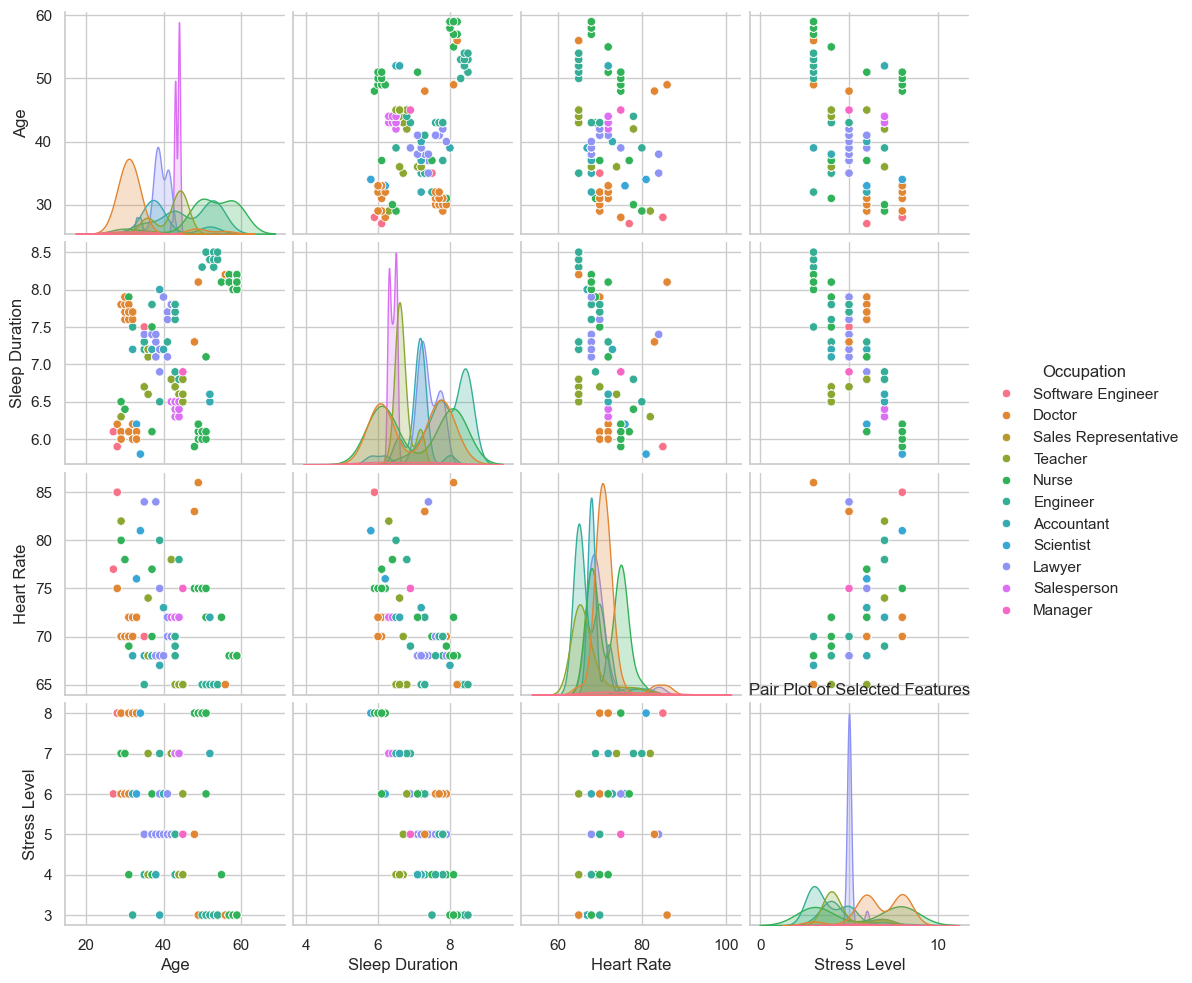

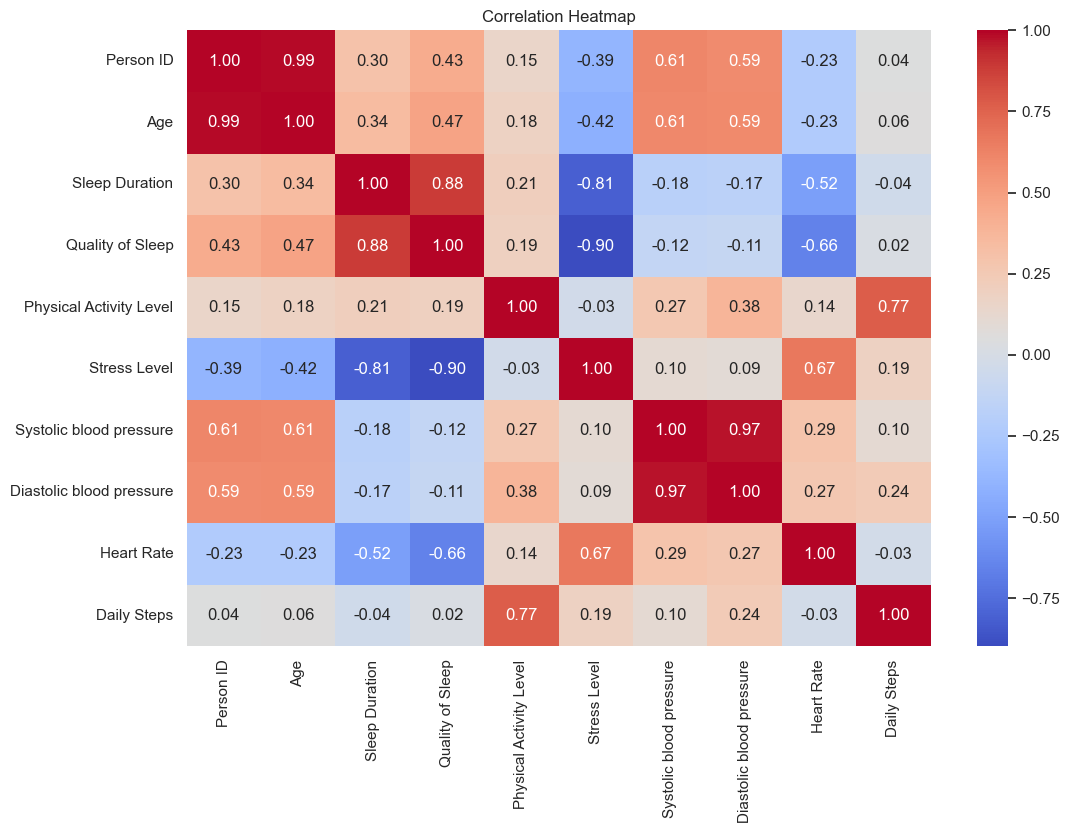

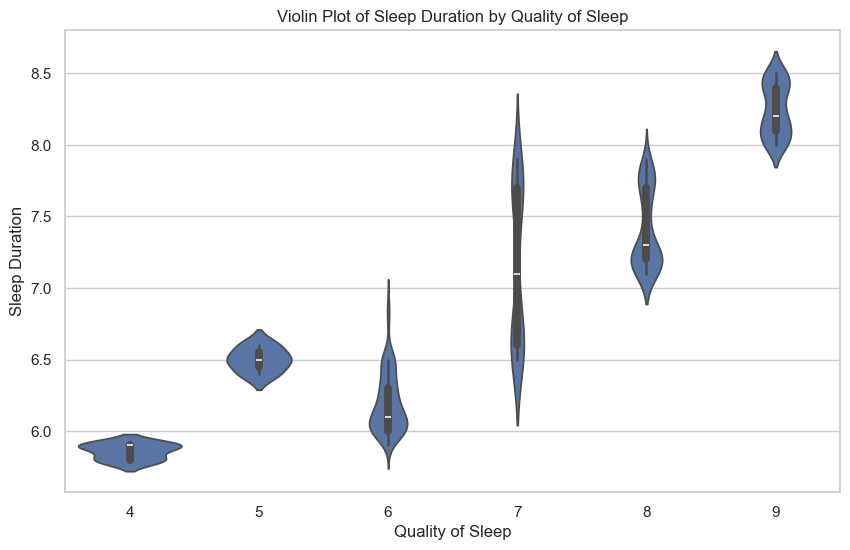

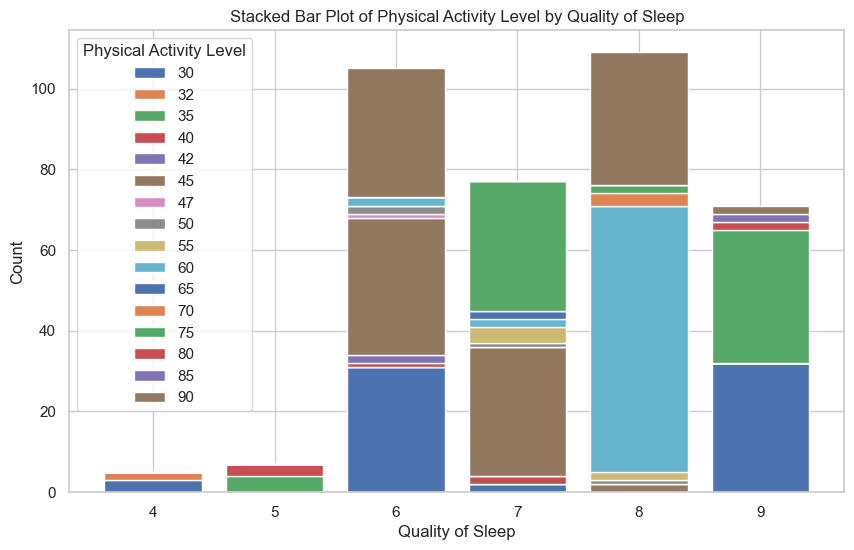

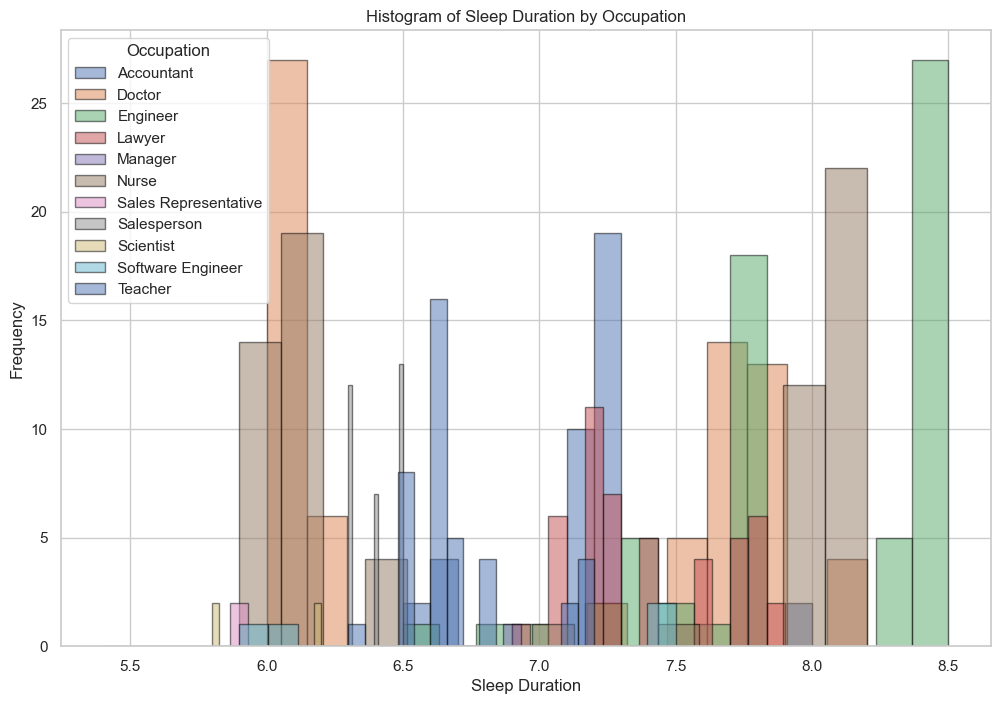

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('sleep_health.csv')

sns.set(style="whitegrid")

# 1. Pair Plot using Pandas (Seaborn)
sns.pairplot(data, vars=['Age', 'Sleep Duration', 'Heart Rate', 'Stress Level'], hue='Occupation')
plt.title('Pair Plot of Selected Features')
plt.show()

# 2. Correlation Matrix and Heatmap using Pandas
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 3. Violin Plot for Sleep Duration based on Quality of Sleep using Pandas
plt.figure(figsize=(10, 6))
sns.violinplot(x='Quality of Sleep', y='Sleep Duration', data=data)
plt.title('Violin Plot of Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

# 4. Stacked Bar Plot for Physical Activity Level by Quality of Sleep using NumPy
activity_levels = np.unique(data['Physical Activity Level'])
quality_levels = np.unique(data['Quality of Sleep'])
counts = np.zeros((len(quality_levels), len(activity_levels)))

for i, quality in enumerate(quality_levels):
    for j, activity in enumerate(activity_levels):
        counts[i, j] = np.sum((data['Quality of Sleep'].to_numpy() == quality) & 
                              (data['Physical Activity Level'].to_numpy() == activity))

# Plotting
plt.figure(figsize=(10, 6))
bottoms = np.zeros(len(quality_levels))

for j, activity in enumerate(activity_levels):
    plt.bar(quality_levels, counts[:, j], bottom=bottoms, label=activity)
    bottoms += counts[:, j]

plt.title('Stacked Bar Plot of Physical Activity Level by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.legend(title='Physical Activity Level')
plt.show()

# 5. Histogram of Sleep Duration by Occupation using NumPy
plt.figure(figsize=(12, 8))
occupations = np.unique(data['Occupation'])

for occupation in occupations:
    plt.hist(data[data['Occupation'] == occupation]['Sleep Duration'].to_numpy(), 
             bins=15, alpha=0.5, label=occupation, edgecolor='black')

plt.title('Histogram of Sleep Duration by Occupation')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.legend(title='Occupation')
plt.show()